<font size="6"><b> Project Title: </b> Laptop Price Prediction for SmartTech Co. </font>

<font size="4"><b> Purpose: </b> To develop a robust machine learning model that predicts laptop prices accurately. </font>

<font size="4"><b> Objectives are: </b> <br>
----> Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market. <br>
----> Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market. <br>
----> Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand. <br>  </font>

<b>Importing Libraries

In [ ]:
import pandas as pd  # Chosen for its powerful data manipulation and analysis capabilities
import numpy as np  # Chosen for its efficient numerical operations and array processing
import matplotlib.pyplot as plt  # Chosen for creating static, publication-quality visualizations
import seaborn as sns  # Chosen for its high-level interface to create attractive statistical graphics
import plotly.express as px  # Chosen for creating interactive visualizations with minimal code
import warnings  # Chosen to handle or suppress warnings raised during code execution
warnings.filterwarnings('ignore')

<b> Dataset Importing

In [ ]:
data = pd.read_csv("laptop.csv")

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<b> Data Exploration and Understanding

In [ ]:
data.shape

(1303, 13)

In [ ]:
data.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1273.000000,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,NaN,NaN,19,6,25,40,118,10,40,110,9,189,NaN
top,NaN,NaN,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,NaN,290,710,640,495,183,601,401,271,1047,111,NaN
mean,651.00000,652.674784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,376.28801,376.493027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,327.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,652.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,976.50000,980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


In [ ]:
data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
print('Number of Duplicated Values = ', data.duplicated().sum().sum())
print('Number of Null Values = ', data.isnull().sum().sum())
print('Number of N/A Values = ', data.isna().sum().sum())

Number of Duplicated Values =  0
Number of Null Values =  0
Number of N/A Values =  0


In [ ]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

<b> Doing some Preprocessing with Visualisations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [ ]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

In [ ]:
data.drop(data[data['Weight'] == '?'].index, inplace=True)
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float64')

In [ ]:
data.drop(data[data['Inches'] == '?'].index, inplace=True)
data['Inches']=data['Inches'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   int32  
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float64
 10  Price             1271 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.2+ KB


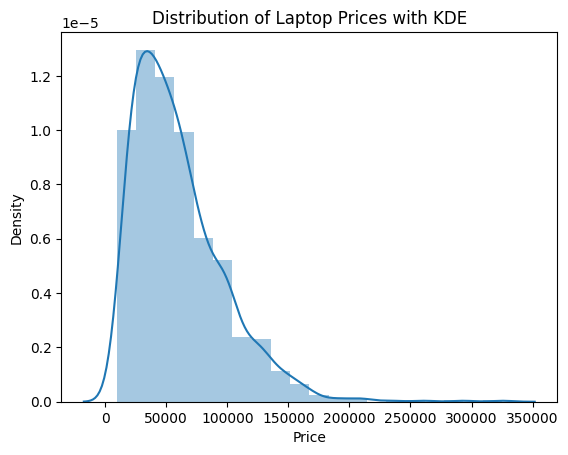

In [ ]:
sns.distplot(data['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Laptop Prices with KDE')
plt.show()

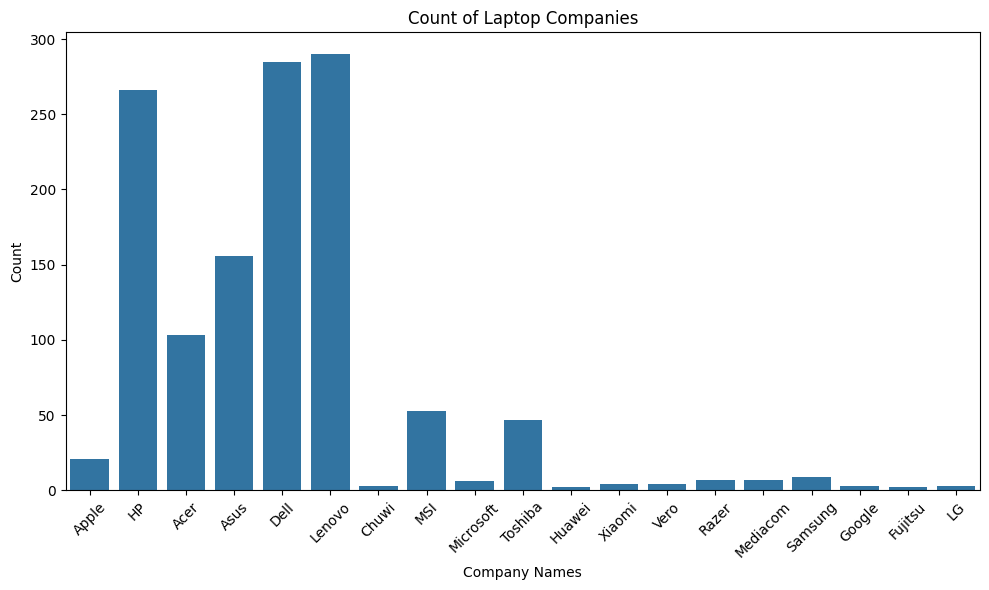

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Company')
plt.xlabel('Company Names')
plt.ylabel('Count')
plt.title('Count of Laptop Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.bar(data, x='TypeName')
fig.update_xaxes(title='TypeName')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='purple')
fig.show()

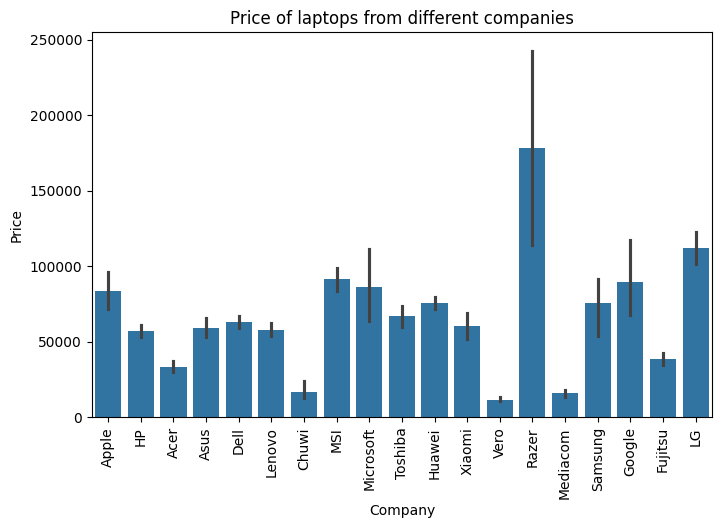

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Company'], y=data['Price'])
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price of laptops from different companies')
plt.xticks(rotation='vertical')
plt.show()

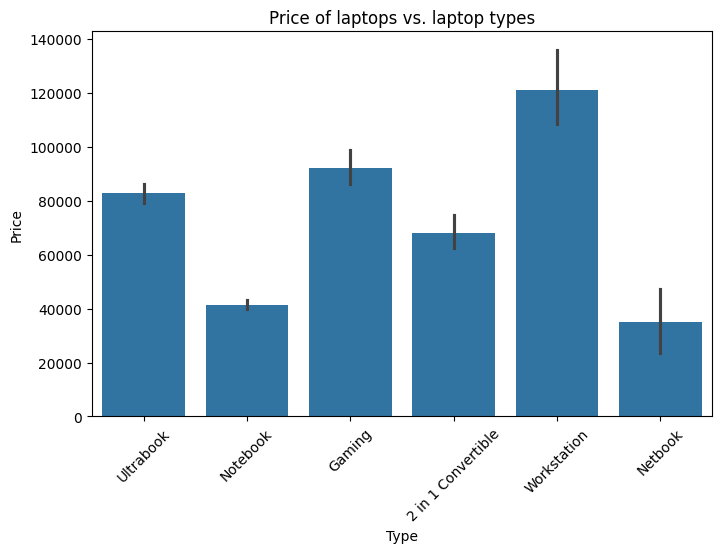

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price of laptops vs. laptop types')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

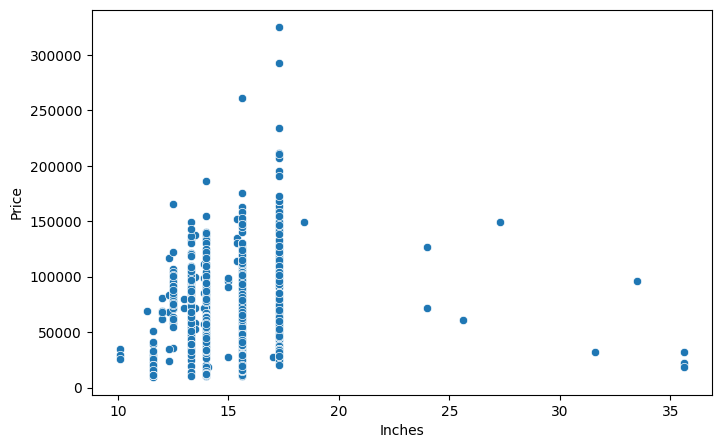

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Inches'], y=data['Price'])

<b> Feature Engineering

In [ ]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                493
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
data['Touch_screen_laptop']=data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [ ]:
data['IPS_laptop']=data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen_laptop,IPS_laptop
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: ylabel='count'>

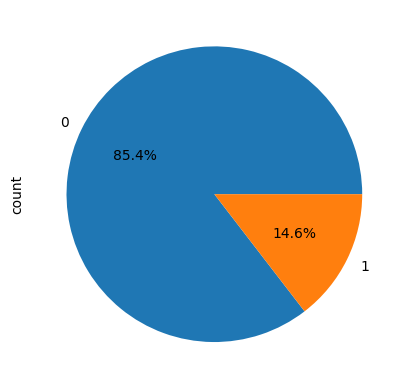

In [ ]:
data['Touch_screen_laptop'].value_counts().plot(kind="pie",autopct="%0.01f%%")

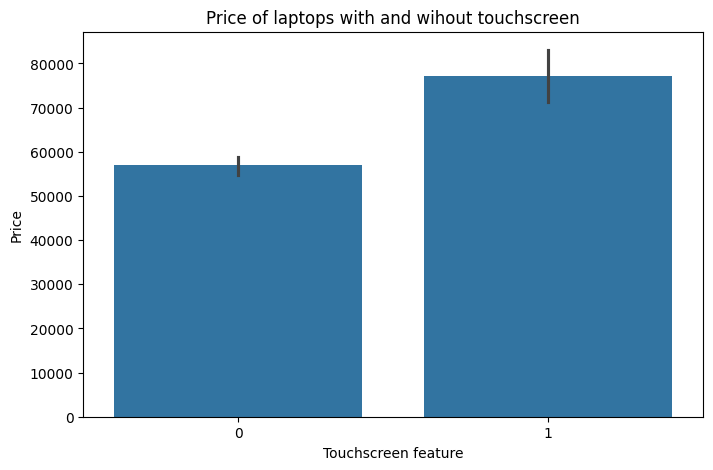

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Touch_screen_laptop'], y=data['Price'])
plt.xlabel('Touchscreen feature')
plt.ylabel('Price')
plt.title('Price of laptops with and wihout touchscreen')
plt.show()

In [ ]:
data['Resolution_in_pixels']=data['ScreenResolution'].str.split(' ').str[-1]

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen_laptop,IPS_laptop,Resolution_in_pixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600


In [ ]:
width=data['Resolution_in_pixels'].str.split('x').str[0].astype('float')
height=data['Resolution_in_pixels'].str.split('x').str[1].astype('float')

In [ ]:
data['PPI']=((width**2)+(height**2))**0.5/data['Inches'] #Creating a new feature to get better idea about picture quality

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1271 non-null   object 
 1   TypeName              1271 non-null   object 
 2   Inches                1271 non-null   float64
 3   ScreenResolution      1271 non-null   object 
 4   Cpu                   1271 non-null   object 
 5   Ram                   1271 non-null   int32  
 6   Memory                1271 non-null   object 
 7   Gpu                   1271 non-null   object 
 8   OpSys                 1271 non-null   object 
 9   Weight                1271 non-null   float64
 10  Price                 1271 non-null   float64
 11  Touch_screen_laptop   1271 non-null   int64  
 12  IPS_laptop            1271 non-null   int64  
 13  Resolution_in_pixels  1271 non-null   object 
 14  PPI                   1271 non-null   float64
dtypes: float64(4), int32(1), i

In [ ]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [ ]:
data['Cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
def categorise_cpu(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
data['Cpu_Types'] = data['Cpu_name'].apply(categorise_cpu)

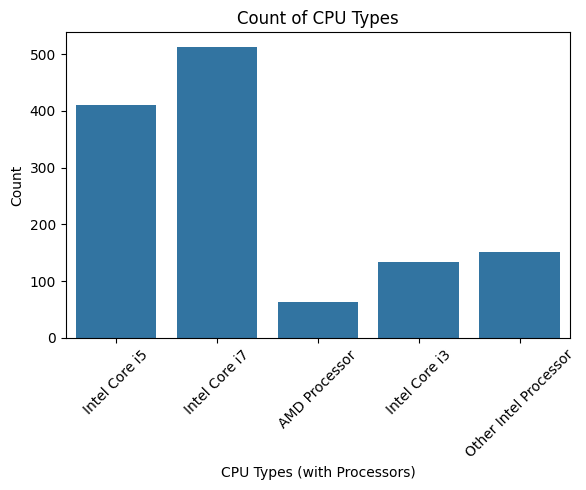

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Cpu_Types')
plt.xlabel('CPU Types (with Processors)')
plt.ylabel('Count')
plt.title('Count of CPU Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

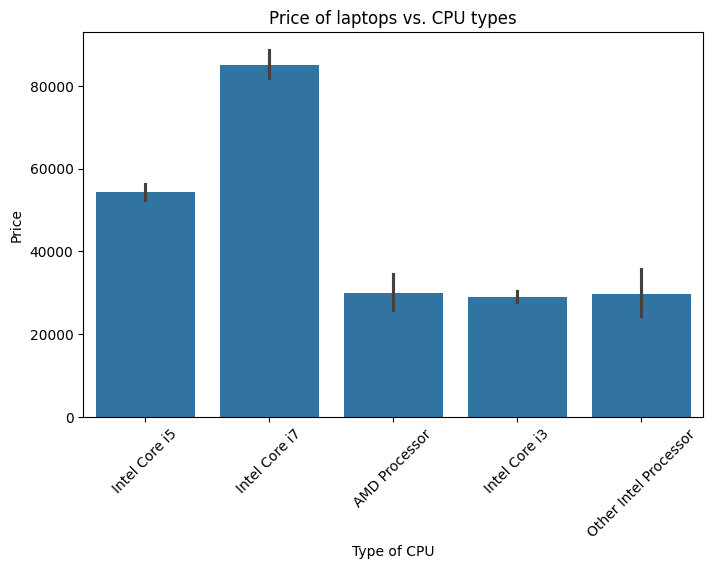

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Cpu_Types'], y=data['Price'])
plt.xlabel('Type of CPU')
plt.ylabel('Price')
plt.title('Price of laptops vs. CPU types')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen_laptop,IPS_laptop,Resolution_in_pixels,PPI,Cpu_name,Cpu_Types
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5


In [ ]:
data.drop(columns=['Cpu','Cpu_name','ScreenResolution','Cpu','Resolution_in_pixels','Inches'],inplace=True)

In [ ]:
data['Memory'].value_counts()

Memory
256GB SSD                        399
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
data.drop(data[data['Memory'] == '?'].index, inplace=True)
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

In [ ]:
new_mem = data['Memory'].str.split('+', expand =True)

In [ ]:
new_mem.value_counts()

0                  1            
128 SSD              1000 HDD       92
256 SSD              1000 HDD       71
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
Name: count, dtype: int64

In [ ]:
data['first_part'] = new_mem[0]
data["first_part"]=data["first_part"].str.strip()
data['second_part'] = new_mem[1]
data["second_part"]=data["second_part"].str.strip()

In [ ]:
data['first_hdd'] = data['first_part'].apply(lambda x: 1 if 'HDD' in x else 0)
data['first_ssd'] = data['first_part'].apply(lambda x: 1 if 'SSD' in x else 0)
data["first_hybrid"] = data["first_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["first_flashstorage"] = data["first_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
data['first_part'] = data['first_part'].str.extract('(\d+)', expand=False)

In [ ]:
data["second_part"].fillna("0", inplace = True)

In [ ]:
data["second_hdd"] = data["second_part"].apply(lambda x: 1 if "HDD" in x else 0)
data["second_ssd"] = data["second_part"].apply(lambda x: 1 if "SSD" in x else 0)
data["second_hybrid"] = data["second_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["second_flashstorage"] = data["second_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
data['second_part'] = data['second_part'].str.extract('(\d+)', expand=False)

In [ ]:
data["first_part"] = data["first_part"].fillna(0).astype(int)
data["second_part"] = data["second_part"].fillna(0).astype(int)

In [ ]:
data["HDD"]=(data["first_part"]*data["first_hdd"]+data["second_part"]*data["second_hdd"])

In [ ]:
data["SSD"]=(data["first_part"]*data["first_ssd"]+data["second_part"]*data["second_ssd"])

In [ ]:
data["Hybrid"]=(data["first_part"]*data["first_hybrid"]+data["second_part"]*data["second_hybrid"])

In [ ]:
data["Flash_Storage"]=(data["first_part"]*data["first_flashstorage"]+data["second_part"]*data["second_flashstorage"])

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen_laptop,IPS_laptop,...,first_hybrid,first_flashstorage,second_hdd,second_ssd,second_hybrid,second_flashstorage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [ ]:
data.drop(columns=['first_part', 'second_part', 'first_hdd', 'first_ssd', 'first_hybrid',
       'first_flashstorage', 'second_hdd', 'second_ssd', 'second_hybrid',
       'second_flashstorage'], inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen_laptop,IPS_laptop,PPI,Cpu_Types,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
data['HDD'].value_counts()

HDD
0       706
1000    398
500     132
2000     32
32        1
128       1
Name: count, dtype: int64

In [ ]:
data['SSD'].value_counts()

SSD
256     483
0       450
128     168
512     136
1000     15
32        6
180       4
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64

In [ ]:
data['Hybrid'].value_counts()

Hybrid
0       1258
1000      11
508        1
Name: count, dtype: int64

In [ ]:
data['Flash_Storage'].value_counts()

Flash_Storage
0      1197
32       37
64       15
256       8
16        7
128       4
512       2
Name: count, dtype: int64

In [ ]:
data.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)

In [ ]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
data['Gpu_Company']=data['Gpu'].str.split(' ').str[0]

<Axes: xlabel='Gpu_Company'>

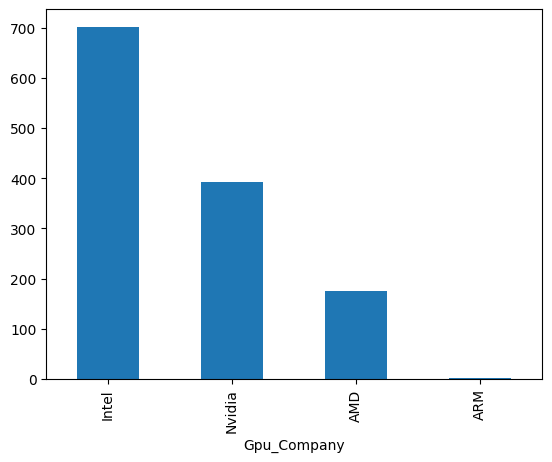

In [ ]:
data['Gpu_Company'].value_counts().plot(kind="bar")

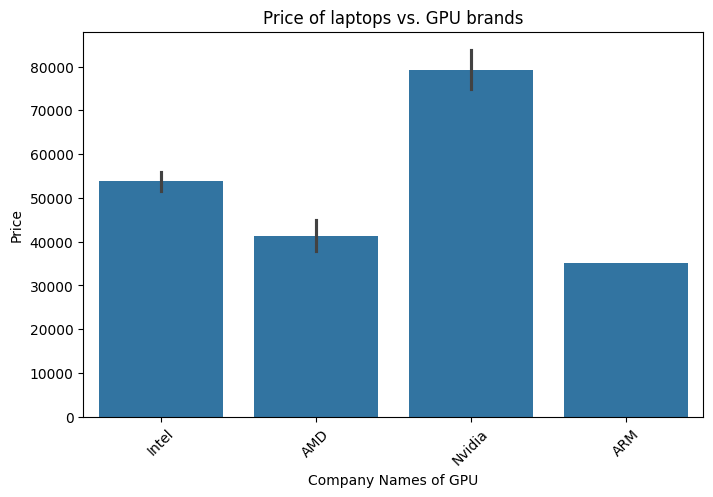

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Gpu_Company'], y=data['Price'])
plt.xlabel('Company Names of GPU')
plt.ylabel('Price')
plt.title('Price of laptops vs. GPU brands')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.drop(columns=['Gpu'],inplace=True)

In [ ]:
data['OpSys'].value_counts()

OpSys
Windows 10      1044
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [ ]:
def categorise_OS(i):
    if i == 'Windows 10' or i == 'Windows 7' or i == 'Windows 10 S':
        return 'Windows'
    elif i == 'macOS' or i == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [ ]:
data['OS'] = data['OpSys'].apply(categorise_OS)

In [ ]:
data.drop(columns=['OpSys'],inplace=True)

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touch_screen_laptop,IPS_laptop,PPI,Cpu_Types,HDD,SSD,Gpu_Company,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS'>

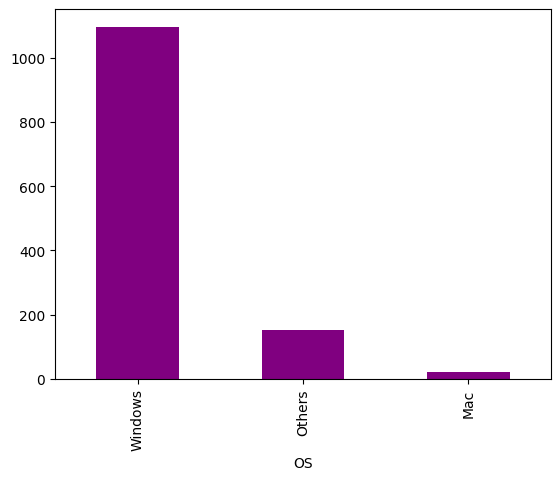

In [ ]:
data['OS'].value_counts().plot(kind="bar", color="purple")

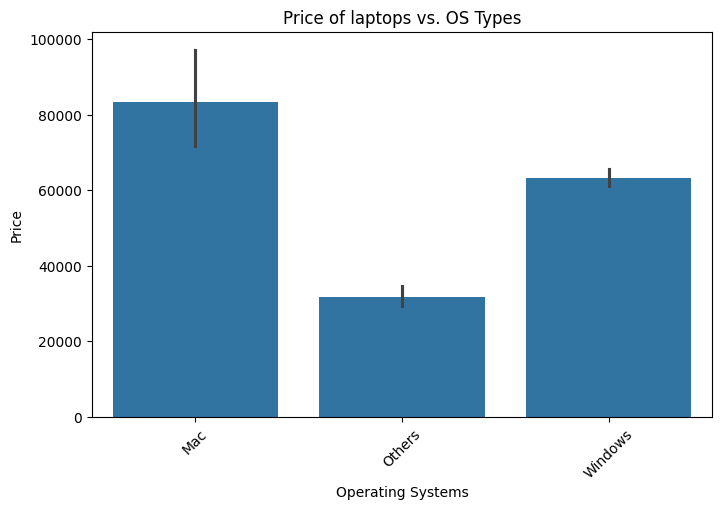

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['OS'], y=data['Price'])
plt.xlabel('Operating Systems')
plt.ylabel('Price')
plt.title('Price of laptops vs. OS Types')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

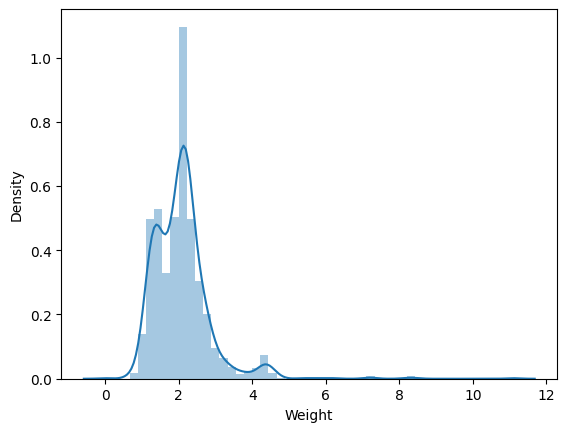

In [ ]:
sns.distplot(data['Weight'])

Text(0.5, 1.0, 'Weight VS Price')

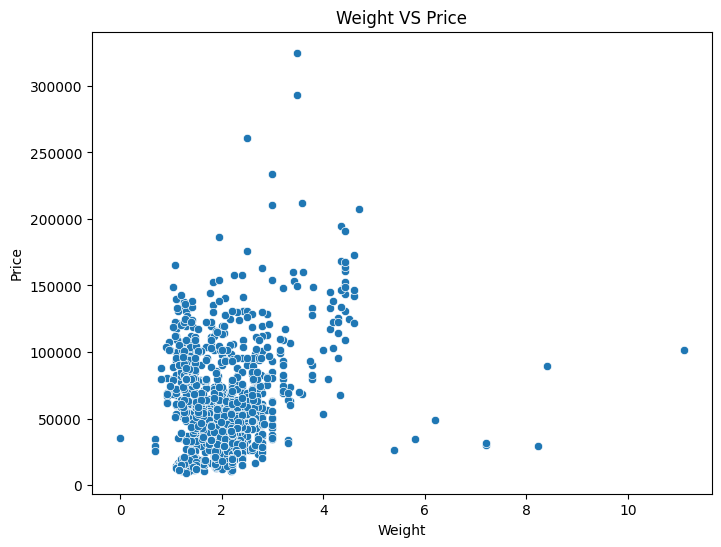

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data['Weight'],y=data['Price'])
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight VS Price')

In [ ]:
df_corr = data.corr(numeric_only=True)['Price'].sort_values(ascending=False).reset_index()
df_corr

,index,Price
0,Price,1.000000
1,Ram,0.687176
2,SSD,0.669050
3,PPI,0.469340
4,IPS_laptop,0.256502
5,Touch_screen_laptop,0.190070
6,Weight,0.176689
7,HDD,-0.094097


In [ ]:
data.drop(columns=['HDD','Weight'],inplace=True)

<b> Outlier Detection and Clipping

<Axes: xlabel='Price'>

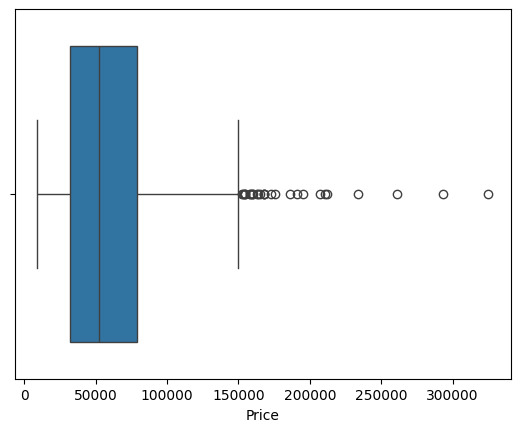

In [ ]:
sns.boxplot(data=data,x='Price')

In [ ]:
# Calculate the first quartile and third quartile
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers using the lower and upper bounds
data['Price'] = data['Price'].clip(lower=lower_bound, upper=upper_bound)

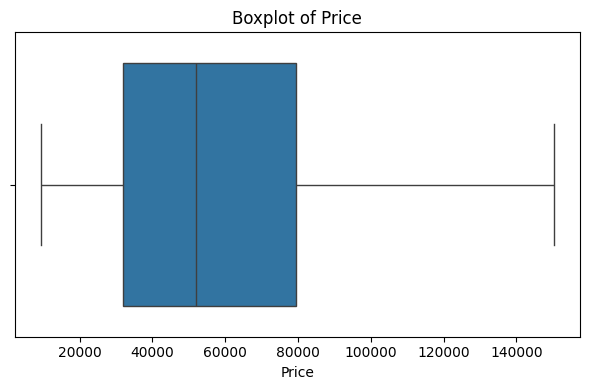

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Price'])
plt.title(f'Boxplot of Price')
plt.tight_layout()
plt.show()

<b> Getting variables ready

In [ ]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
X_train

,Company,TypeName,Ram,Touch_screen_laptop,IPS_laptop,PPI,Cpu_Types,SSD,Gpu_Company,OS
945,Lenovo,Gaming,16,0,1,141.211998,AMD Processor,512,AMD,Windows
477,Lenovo,Notebook,8,0,0,157.350512,Intel Core i5,180,Intel,Windows
85,Dell,Gaming,16,0,1,141.211998,Intel Core i7,128,Nvidia,Windows
1034,HP,Notebook,8,0,0,141.211998,Intel Core i7,256,Intel,Windows
662,Lenovo,Notebook,4,0,0,141.211998,Intel Core i5,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...
480,Dell,Notebook,8,0,1,141.211998,Intel Core i7,512,Nvidia,Windows
309,HP,Notebook,4,0,0,141.211998,Intel Core i3,0,Intel,Windows
507,Acer,Notebook,4,0,1,141.211998,Intel Core i5,0,Nvidia,Windows
541,Dell,Notebook,4,0,0,157.350512,Intel Core i3,128,Intel,Windows


In [ ]:
y_test

610     11.920970
1168     9.493014
533      9.886358
948     10.466285
549     11.430860
          ...    
1247    11.727036
909     11.524644
1205    10.765658
92      11.063135
1086    11.285443
Name: Price, Length: 381, dtype: float64

<b> Model Development

In [ ]:
from sklearn.compose import ColumnTransformer  # Transforme columns with different preprocessing requirements
from sklearn.pipeline import Pipeline  # Construct a sequence of data transformations followed by model fitting
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encodes categorical variables and scaling numerical variables
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Chosen for evaluating model performance
from sklearn.model_selection import RandomizedSearchCV  # Chosen for hyperparameter tuning using randomized search
from sklearn.linear_model import LinearRegression  # Chosen for linear regression modeling
from sklearn.neighbors import KNeighborsRegressor  # Chosen for k-nearest neighbors regression modeling
from sklearn.tree import DecisionTreeRegressor  # Chosen for decision tree regression modeling
from sklearn.ensemble import RandomForestRegressor  # Chosen for random forest regression modeling
from sklearn.svm import SVR    # Chosen for support vector regression modeling
from sklearn.ensemble import GradientBoostingRegressor  # Chosen for gradient boosting regression modeling

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.7959272204397687
RMSE:  0.2778180561913828


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.7983183935007114
RMSE:  0.2761856275208679


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.8076684383830441
RMSE:  0.2697076142285239


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.8075651808954747
RMSE:  0.26978000378723443


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=100)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.8555984123911328
RMSE:  0.23369741712151676


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,8,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=100)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))

R2 score 0.7875840890495773
RMSE:  0.28344020316776236


<b> Hyperparameter Tuning of Random Forest model

In [ ]:
param_grid = {
    'n_estimators' : [5,20,50,100], # number of trees in the random forest
    'max_features' : ['auto', 'sqrt'], # number of features in consideration at every split
    'max_depth' : [int(x) for x in np.linspace(10, 120, num = 5)], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [2, 6, 10], # minimum sample number to split a node
    'min_samples_leaf' : [1, 3, 4], # minimum sample number that can be stored in a leaf node
    'bootstrap' : [True, False]
}
# Define the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,6,8,9])
], remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('random_search', RandomizedSearchCV(estimator=step2, param_distributions=param_grid,
                                         n_iter=100, cv=5, verbose=2, random_state=3, n_jobs=-1))
])
pipe.fit(X_train, y_train)

best_params = pipe.named_steps['random_search'].best_params_
best_score = pipe.named_steps['random_search'].best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

feature_importances = pipe.named_steps['random_search'].best_estimator_.feature_importances_

y_pred = pipe.predict(X_test)

# Evaluate the model using R2 score and RMSE
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}
Best Score: 0.8683505682768932
R2 score: 0.8702539729830829
RMSE: 0.22152103022357578


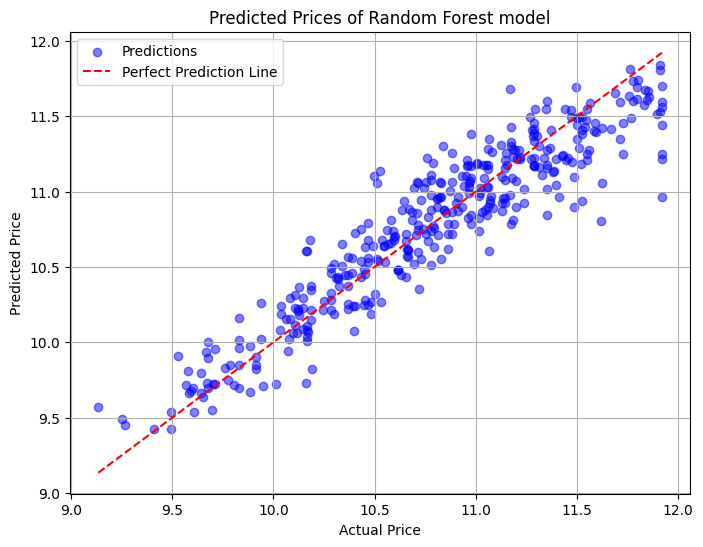

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted Prices of Random Forest model')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<font size="4"> This figure displays a scatter plot comparing the actual prices of items to the predicted prices generated by the Random Forest Regressor model. The scatter points represent individual predictions, while the dashed red line illustrates perfect prediction alignment. </font>

<b> Getting most important features

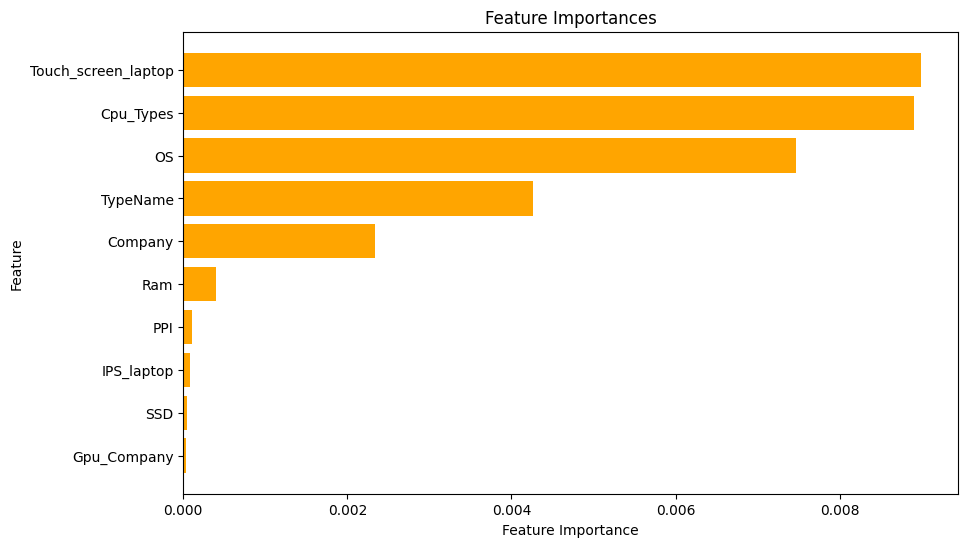

In [ ]:
sorted_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center', color='orange')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
features

('Touch_screen_laptop',
 'Cpu_Types',
 'OS',
 'TypeName',
 'Company',
 'Ram',
 'PPI',
 'IPS_laptop',
 'SSD',
 'Gpu_Company')

In [ ]:
X_train_new = X_train[['Touch_screen_laptop', 'Cpu_Types', 'OS', 'TypeName', 'Company', 'Ram', 'PPI']]
X_test_new = X_test[['Touch_screen_laptop', 'Cpu_Types', 'OS', 'TypeName', 'Company', 'Ram', 'PPI']]

In [ ]:
X_train_new

,Touch_screen_laptop,Cpu_Types,OS,TypeName,Company,Ram,PPI
945,0,AMD Processor,Windows,Gaming,Lenovo,16,141.211998
477,0,Intel Core i5,Windows,Notebook,Lenovo,8,157.350512
85,0,Intel Core i7,Windows,Gaming,Dell,16,141.211998
1034,0,Intel Core i7,Windows,Notebook,HP,8,141.211998
662,0,Intel Core i5,Windows,Notebook,Lenovo,4,141.211998
...,...,...,...,...,...,...,...
480,0,Intel Core i7,Windows,Notebook,Dell,8,141.211998
309,0,Intel Core i3,Windows,Notebook,HP,4,141.211998
507,0,Intel Core i5,Windows,Notebook,Acer,4,141.211998
541,0,Intel Core i3,Windows,Notebook,Dell,4,157.350512


<b> Developing the ML model with most important features

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,3,4])
],remainder='passthrough')

step2 = RandomForestRegressor(bootstrap=False, max_depth=120, max_features='sqrt', min_samples_leaf=1,
                      min_samples_split=6, n_estimators=50)

reduced_RandomForset = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

reduced_RandomForset.fit(X_train_new,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2, 3, 4])])),
                ('step2',
                 RandomForestRegressor(bootstrap=False, max_depth=120,
                                       max_features='sqrt', min_samples_split=6,
                                       n_estimators=50))])

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.0 MB/

<b> Gradio App for Real-time Predictions

In [ ]:
import gradio as gr

def predict_price(Touch_screen_laptop, Cpu_Types, OS, TypeName, Company, Ram, PPI):
    input_data = pd.DataFrame({'Touch_screen_laptop': [Touch_screen_laptop], 'Cpu_Types': [Cpu_Types],
                               'OS': [OS], 'TypeName': [TypeName], 'Company': [Company], 'Ram': [Ram],
                               'PPI': [PPI]})
    log_pred = reduced_RandomForset.predict(input_data)[0]
    original_pred = np.exp(log_pred)
    return float(original_pred)

touch_screen_options = ["0", "1"]
cpu_types_options = ['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3', 'Other Intel Processor']
os_options = ['Mac', 'Others', 'Windows']
type_name_options = ['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook']
company_options = ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba',
                   'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
ram_options = [8, 16, 4, 2, 12, 64, 6, 32, 24, 1]



touch_screen_input = gr.Dropdown(choices=touch_screen_options, label="Touch Screen Laptop")
company_input = gr.Dropdown(choices=company_options, label="Laptop Brand")
cpu_types_input = gr.Dropdown(choices=cpu_types_options, label="CPU Types")
ram_input = gr.Dropdown(choices=ram_options, label="RAM")
os_input = gr.Dropdown(choices=os_options, label="Operating System")
type_name_input = gr.Dropdown(choices=type_name_options, label="Type Name")
ppi_input = gr.Number(label="Pixels per inch (PPI)")

output = gr.Number(label="Predicted Price")
iface = gr.Interface(
    fn=predict_price,
    inputs=[touch_screen_input, cpu_types_input, os_input, type_name_input, company_input, ram_input, ppi_input],
    outputs=output,
    title="Price Prediction App",
    description="Predict the price amount based on various factors.",
    theme="compact",
)
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8296753ed75c21e410.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
